## LR-Classification - error - matrix

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# Question 1

Import the data and do the following :
* Examine the data types - and come up with count on different kind  of data types
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity ( target feature )

In [2]:
filepath = 'datasets/human_activity/Human_Activity_Smartphones.csv'
data = pd.read_csv(filepath)

data.count().T

angle(tBodyAccMean,gravity)             3628
angle(tBodyAccJerkMean),gravityMean)    3628
angle(tBodyGyroMean,gravityMean)        3628
angle(tBodyGyroJerkMean,gravityMean)    3628
angle(X,gravityMean)                    3628
angle(Y,gravityMean)                    3628
angle(Z,gravityMean)                    3628
Activity                                3628
dtype: int64

In [3]:
# for i in data.columns:
#     print (i)

In [4]:
data.skew(axis = 0, skipna = True) 

angle(tBodyAccMean,gravity)            -0.019062
angle(tBodyAccJerkMean),gravityMean)   -0.030108
angle(tBodyGyroMean,gravityMean)       -0.005873
angle(tBodyGyroJerkMean,gravityMean)    0.008858
angle(X,gravityMean)                    0.537796
angle(Y,gravityMean)                   -0.334141
angle(Z,gravityMean)                    0.457946
dtype: float64

In [5]:
a=0
for i in data.Activity.unique():
    a+=1
print (a)

2


In [6]:
data.Activity[data['Activity']=="WALKING"].count()

1722

In [7]:
data.Activity[data['Activity']=="STANDING"].count()

1906

# Question 2
* Encode the required categorical fields

In [8]:
label_encoder = preprocessing.LabelEncoder() 
data['Activity']= label_encoder.fit_transform(data['Activity']) 
data['Activity'].unique() 

array([0, 1], dtype=int64)

# Question 3
* Split the data into train and test data sets.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits

In [9]:
activity = data.Activity
test = data.drop(['Activity'] ,axis = 1)

ytrain, ytest, xtrain, xtest = train_test_split( activity, test, test_size=0.25, random_state=42)

In [10]:
xtrain.count()

angle(tBodyAccMean,gravity)             2721
angle(tBodyAccJerkMean),gravityMean)    2721
angle(tBodyGyroMean,gravityMean)        2721
angle(tBodyGyroJerkMean,gravityMean)    2721
angle(X,gravityMean)                    2721
angle(Y,gravityMean)                    2721
angle(Z,gravityMean)                    2721
dtype: int64

In [11]:
xtest.count()

angle(tBodyAccMean,gravity)             907
angle(tBodyAccJerkMean),gravityMean)    907
angle(tBodyGyroMean,gravityMean)        907
angle(tBodyGyroJerkMean,gravityMean)    907
angle(X,gravityMean)                    907
angle(Y,gravityMean)                    907
angle(Z,gravityMean)                    907
dtype: int64

In [12]:
ytrain.count()

2721

In [13]:
ytest.count()

907

# Question 4

* Fit a logistic regression model without any regularization using all of the features. Store the model.

In [14]:
clf = LogisticRegression(random_state=0).fit(xtrain, ytrain)
predict = clf.predict(xtest)

# Question 5
* Predict and store the class for the model.
* Also store the probability for the predicted class.

In [15]:
accuracy_score(ytest, predict)

0.5490628445424476

In [16]:
 clf.predict_proba(xtest)

array([[0.57053878, 0.42946122],
       [0.67484486, 0.32515514],
       [0.62940842, 0.37059158],
       ...,
       [0.51497007, 0.48502993],
       [0.5373503 , 0.4626497 ],
       [0.48487355, 0.51512645]])

In [17]:
clf.score(xtest, ytest)

0.5490628445424476

# Question 6
For each model, calculate the following error metrics:
* accuracy
* precision
* recall
* fscore
* confusion matrix

Display or plot the confusion matrix

In [18]:
precision_recall_fscore_support(ytest, predict, average='weighted')

(0.5579153421925679, 0.5490628445424476, 0.5295857295546686, None)

In [19]:
print(classification_report(ytest, predict))

             precision    recall  f1-score   support

          0       0.54      0.75      0.63       455
          1       0.58      0.35      0.43       452

avg / total       0.56      0.55      0.53       907



In [23]:
conmat = confusion_matrix(ytest, predict)
conmat

array([[342, 113],
       [296, 156]], dtype=int64)

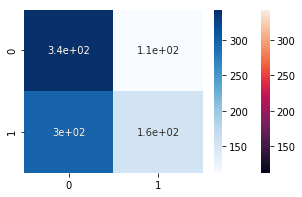

In [43]:
df_cm = pd.DataFrame(conmat)
plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot=True )

sns.heatmap(df_cm, annot=True ,cmap=plt.cm.Blues, annot_kws={"size": 10})
# seamap = sns.color_palette("Set2")
# sns.heatmap(df_cm, center=0, cmap=sns.color_palette("Set2"))

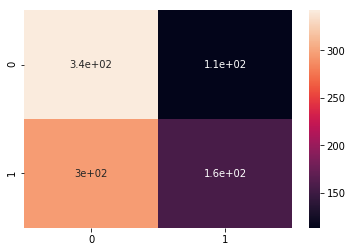

In [31]:
sns.heatmap(conmat, annot=True, annot_kws={"size": 10}) # font size
plt.show()